In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import copy
from sklearn.metrics import confusion_matrix
from skimage.metrics import structural_similarity as ssim
from skimage.feature import hessian_matrix, hessian_matrix_eigvals


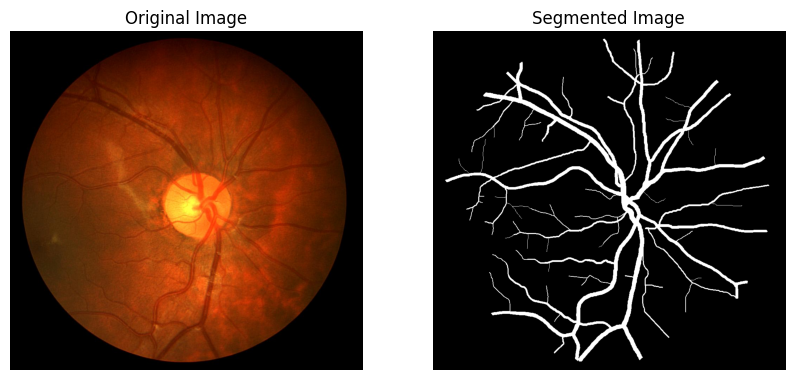

In [17]:
img_path = r'CHASEDB1\Image_01R.jpg'
img = Image.open(img_path)
img_array = np.array(img)

ground_img_path = r'CHASEDB1\Image_01R_1stHO.png'
ground_img = Image.open(ground_img_path)
ground_img_array = np.array(ground_img)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(img_array)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(ground_img_array, cmap='grey')
plt.title("Segmented Image")
plt.axis('off')

plt.show()

In [18]:
def accuracy_func(image1, image2):

    segmented_vessels = image1
    segmented_image = image2

    ssim_score = ssim(segmented_image, segmented_vessels, data_range=255)
    psnr_score = float('inf')
    mse = np.mean((image1 - image2) ** 2)
    if mse != 0:
        max_pixel = 255.0
        psnr_score = 20 * np.log10(max_pixel / np.sqrt(mse))

    generated_binary = (segmented_vessels > 0).astype(np.uint8)
    target_binary = (segmented_image > 0).astype(np.uint8)

    tn, fp, fn, tp = confusion_matrix(target_binary.ravel(), generated_binary.ravel()).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = 2/((1/specificity)+(1/sensitivity))
    
    print(f'SSIM: {ssim_score:.4f}')
    print(f'PSNR: {psnr_score:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')
    print(f'f1: {f1:.4f}')

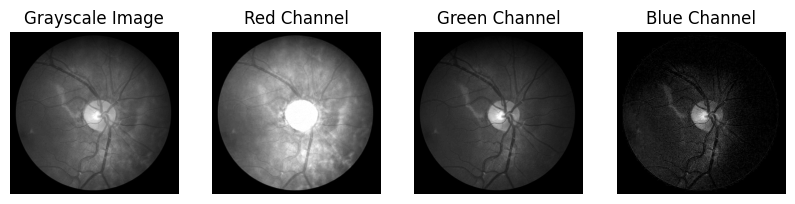

In [19]:
img_gray = img.convert('L')
img_gray_array = np.array(img_gray)

red_channel = img_array[:, :, 0]
green_channel = img_array[:, :, 1]
blue_channel = img_array[:, :, 2]

plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

plt.show()

(array([2.95807e+05, 4.75600e+03, 3.92800e+03, 8.45700e+03, 6.22800e+03,
        9.83400e+03, 8.47500e+03, 1.34510e+04, 1.23270e+04, 1.94150e+04,
        2.63830e+04, 1.86900e+04, 2.96680e+04, 2.30780e+04, 3.51640e+04,
        2.54840e+04, 3.87560e+04, 3.00070e+04, 4.94170e+04, 3.04490e+04,
        4.03300e+04, 3.13500e+04, 1.83800e+04, 2.50270e+04, 1.51630e+04,
        2.08580e+04, 1.22260e+04, 1.75490e+04, 1.03050e+04, 1.35350e+04,
        1.09580e+04, 5.85200e+03, 7.03100e+03, 3.58100e+03, 4.37200e+03,
        2.26900e+03, 2.84900e+03, 1.55300e+03, 1.91500e+03, 1.05100e+03,
        1.24300e+03, 9.87000e+02, 5.47000e+02, 7.44000e+02, 5.20000e+02,
        9.50000e+02, 8.23000e+02, 1.28100e+03, 7.72000e+02, 9.19000e+02,
        8.81000e+02, 5.68000e+02, 8.03000e+02, 5.75000e+02, 7.50000e+02,
        4.53000e+02, 5.44000e+02, 3.32000e+02, 5.23000e+02, 2.93000e+02,
        4.03000e+02, 4.39000e+02, 2.60000e+02, 3.81000e+02, 2.58000e+02,
        3.99000e+02, 3.32000e+02, 4.70000e+02, 2.76

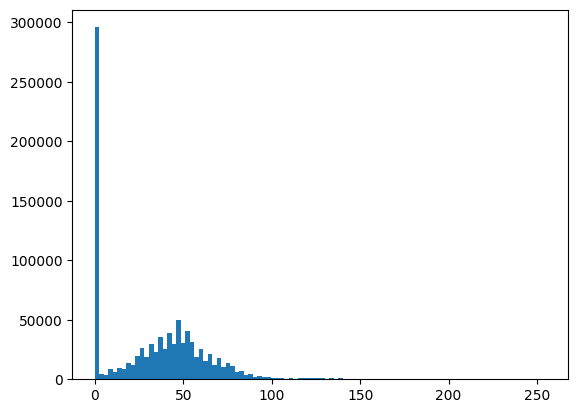

In [20]:
plt.hist(green_channel.flat, bins=100, range=(0, 255))

(array([0.00000e+00, 2.87468e+05, 5.03200e+03, 3.42200e+03, 1.46200e+03,
        1.71000e+03, 1.00300e+03, 2.32400e+03, 2.44300e+03, 4.79900e+03,
        5.35900e+03, 4.93500e+03, 8.36100e+03, 6.12700e+03, 1.10310e+04,
        9.07900e+03, 1.48510e+04, 1.09790e+04, 1.82990e+04, 1.39380e+04,
        2.27090e+04, 2.55300e+04, 1.83510e+04, 2.83790e+04, 1.96360e+04,
        3.04210e+04, 2.06460e+04, 3.05130e+04, 2.00630e+04, 2.88290e+04,
        2.65320e+04, 1.68490e+04, 2.30010e+04, 1.47480e+04, 2.02810e+04,
        1.21020e+04, 1.77810e+04, 1.12830e+04, 1.52720e+04, 9.10000e+03,
        1.30130e+04, 1.17060e+04, 6.92400e+03, 9.69900e+03, 5.90100e+03,
        8.18800e+03, 4.99700e+03, 6.74100e+03, 4.16800e+03, 5.66300e+03,
        5.07600e+03, 3.10000e+03, 4.13600e+03, 2.55800e+03, 3.65800e+03,
        2.12800e+03, 2.99900e+03, 1.66300e+03, 2.41000e+03, 1.45200e+03,
        2.05000e+03, 1.80600e+03, 1.07600e+03, 1.48100e+03, 9.07000e+02,
        1.18200e+03, 8.09000e+02, 1.08000e+03, 6.92

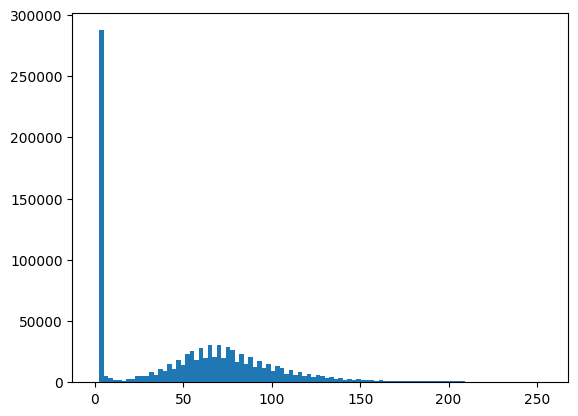

In [21]:
clahe = cv2.createCLAHE(clipLimit = 3, tileGridSize=(8,8))
cl_img_green = clahe.apply(green_channel)
plt.hist(cl_img_green.flat, bins=100, range=(0, 255))

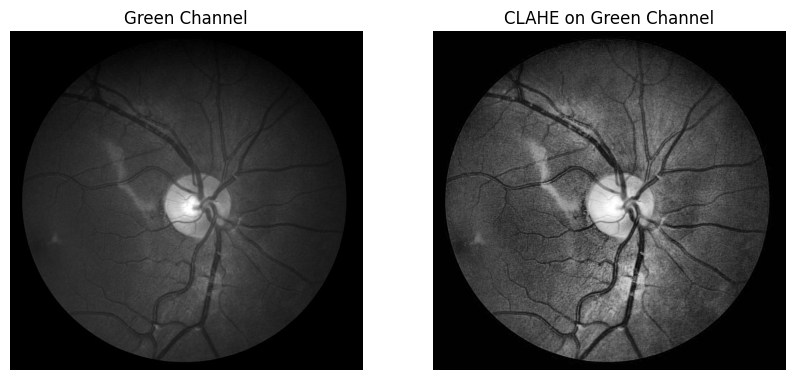

In [22]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cl_img_green, cmap='gray')
plt.title('CLAHE on Green Channel')
plt.axis('off')

plt.show()

In [23]:
cell_disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))

Topen = cv2.morphologyEx(green_channel,cv2.MORPH_OPEN,cell_disc)
Tclose = cv2.morphologyEx(Topen, cv2.MORPH_CLOSE, cell_disc)
TopHat = (green_channel - Tclose)#.astype(np.uint8)
min_image = cv2.erode(TopHat, kernel)
min_image = cv2.dilate(min_image, kernel)

Topen_clahe = cv2.morphologyEx(cl_img_green,cv2.MORPH_OPEN,cell_disc)
Tclose_clahe = cv2.morphologyEx(Topen_clahe, cv2.MORPH_CLOSE, cell_disc)
TopHat_clahe = (cl_img_green - Tclose_clahe)#.astype(np.uint8)
min_image_clahe = cv2.erode(TopHat_clahe, kernel)
min_image_clahe = cv2.dilate(min_image_clahe, kernel)

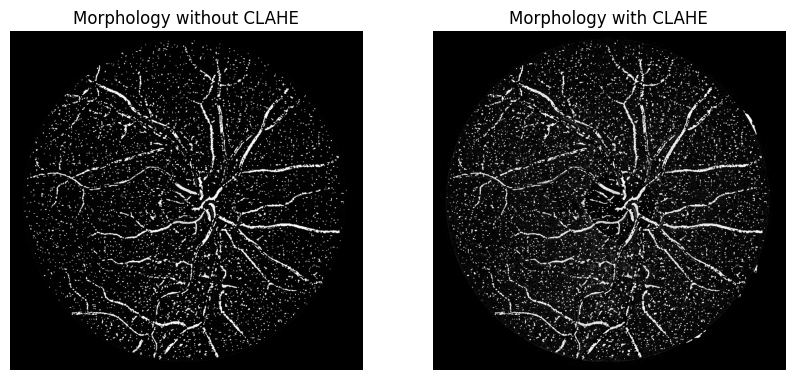

In [24]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(min_image, cmap='gray')
plt.title('Morphology without CLAHE')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(min_image_clahe, cmap='gray')
plt.title('Morphology with CLAHE')
plt.axis('off')

plt.show()

In [25]:
def threshold(img,k):
    ret = copy.deepcopy(img)
    ret[ret<k] = 0
    ret[ret>=k] = 255
    return ret

def GlobalOtsu(img):
    foreground = img[img>=0]
    background = img[img<0]
    
    final_var = (np.var(foreground) * len(foreground) + np.var(background) * len(background))/(len(foreground) + len(background))
    if(np.isnan(final_var)):
        final_var = -1
        
    final_thresh = 0
    for i in np.linspace(np.min(img), np.max(img), num=255):
        foreground = img[img>=i]
        background = img[img<i]
        var = (np.var(foreground) * len(foreground) + np.var(background) * len(background))/(len(foreground) + len(background))
        
        if(np.isnan(var)):
            var = -1
            
        if(var!=-1 and (var<final_var or final_var ==-1)):
            final_var = var
            final_thresh = i
    return threshold(img,final_thresh)

In [26]:
HessWide = hessian_matrix(min_image, sigma=4, order='rc')
EignWide = hessian_matrix_eigvals(HessWide) [1]
HessWide_clahe = hessian_matrix(min_image_clahe, sigma=4, order='rc')
EignWide_clahe = hessian_matrix_eigvals(HessWide_clahe) [1]

val = GlobalOtsu(1-EignWide)
val_clahe = GlobalOtsu(1-EignWide_clahe)

C:\Users\utsav\AppData\Local\Temp\ipykernel_14464\2810804449.py:1: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  HessWide = hessian_matrix(min_image, sigma=4, order='rc')
C:\Users\utsav\AppData\Local\Temp\ipykernel_14464\2810804449.py:3: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  HessWide_clahe = hessian_matrix(min_image_clahe, sigma=4, order='rc')
c:\Users\utsav\miniconda3\envs\dsc\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\utsav\miniconda3\envs\dsc\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_

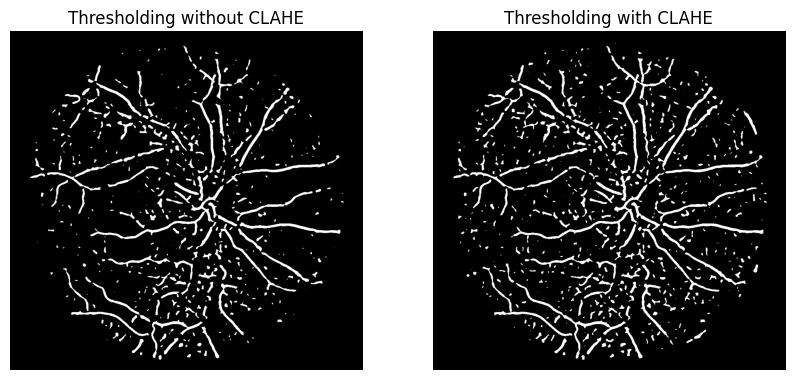

In [27]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(val, cmap='gray')
plt.title('Thresholding without CLAHE')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(val_clahe, cmap='gray')
plt.title('Thresholding with CLAHE')
plt.axis('off')

plt.show()

In [ ]:
print("Accuracy without CLAHE")
accuracy_func(ground_img_array,val)

Accuracy without CLAHE
SSIM: 0.8096
PSNR: 11.7395
Accuracy: 0.9346
Sensitivity: 0.5781
Specificity: 0.9603
f1: 0.7217


In [29]:
print("Accuracy with CLAHE")
accuracy_func(ground_img_array,val_clahe)

Accuracy with CLAHE
SSIM: 0.7639
PSNR: 10.8388
Accuracy: 0.9250
Sensitivity: 0.5058
Specificity: 0.9628
f1: 0.6632


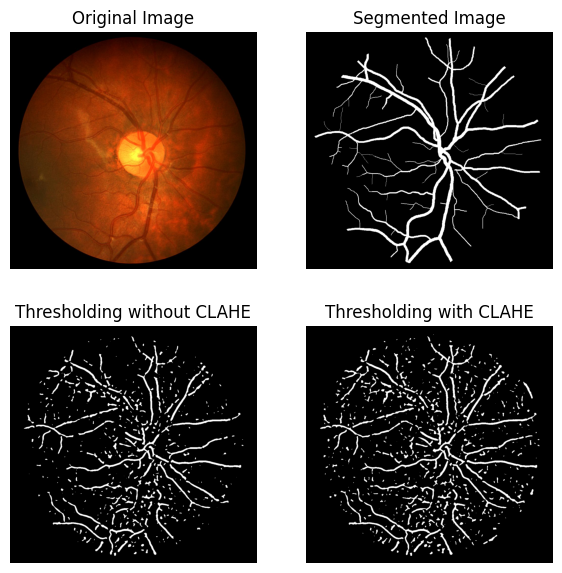

In [31]:
plt.figure(figsize=(7, 7))

plt.subplot(2,2,1)
plt.imshow(img_array)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(ground_img_array, cmap='grey')
plt.title("Segmented Image")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(val, cmap='gray')
plt.title('Thresholding without CLAHE')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(val_clahe, cmap='gray')
plt.title('Thresholding with CLAHE')
plt.axis('off')

plt.show()